In [8]:
import numpy as np 
import pandas as pd

df = pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

print('--------------------------------------------------------------------')
print('Printing INFO:')
print(df.info())
print('--------------------------------------------------------------------')
print('Printing HEAD:')
print(df.head())
print('--------------------------------------------------------------------')
print('Printing DESCRIBE:')
print(df.describe())
print('--------------------------------------------------------------------')




--------------------------------------------------------------------
Printing INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
--------------------------------------------------------------------
Printing HEAD:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1              

# Observations

# # INFO
  * Date is of type object, it should be of type datetime
  * Customer ID is of type object, it should be of type string
  * Gender is of type object, it should be either converted into either 1 or 0, so a bool could also be a good data type.
  * Product Category can be made into enums, using a string with data with space in between would make life easier.

# # HEAD
  * Trasition ID starts with 2 digits, which is a good thing.
  * Date follows the pattern of YYYY-mm-dd
  * Customer ID, follows a good pattern of appending CUST before 3 digit numbers.
  * Rest of data is good.

# # Describe
  * Count for all colomns is 1000.
  * Mean age of shopper is 41.39200, while mean price per unit sold is \\&#36;179.89 and mean total amount of shopping purchase by a person is \\&#36;459.00
  * Max number of items sold in 2023, in one shopping cart was 4.
  * Max number of amount spend per shopping cart is \$2000
    
  

In [9]:
print('--------------------------------------------------------------------')
print('Printing DESCRIBE:')
df.isnull().sum()
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Printing DESCRIBE:
--------------------------------------------------------------------


# Review

No missing values found.

In [10]:

df['Date'] = pd.to_datetime(df['Date'])

print('--------------------------------------------------------------------')

print('Changed the date date type, printing df.INFO:')
print(df.info())

print('--------------------------------------------------------------------')

print('Printing DUPLICATES:')
duplicates = df.duplicated().sum()
print(duplicates)

print('--------------------------------------------------------------------')

print("Priting unique values in categorical columns")
print("Gender:", df['Gender'].unique())
print("Product Category:", df['Product Category'].unique())

print('--------------------------------------------------------------------')





--------------------------------------------------------------------
Changed the date date type, printing df.INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None
--------------------------------------------------------------------
Printing DUPLICATES:
0
-------------------

# # Data Type conversion

Data Type is converted to desired data type

# # Duplicates

We don't have any duplicates

# # Unique values

Gender is only 2 values: Male and Female
Product category are 2 values: Beauty, Clothing and Electronics

--------------------------------------------------------------------
Number of Sales by Gender and Product Category
Product Category  Beauty  Clothing  Electronics
Gender                                         
Female               166       174          170
Male                 141       177          172


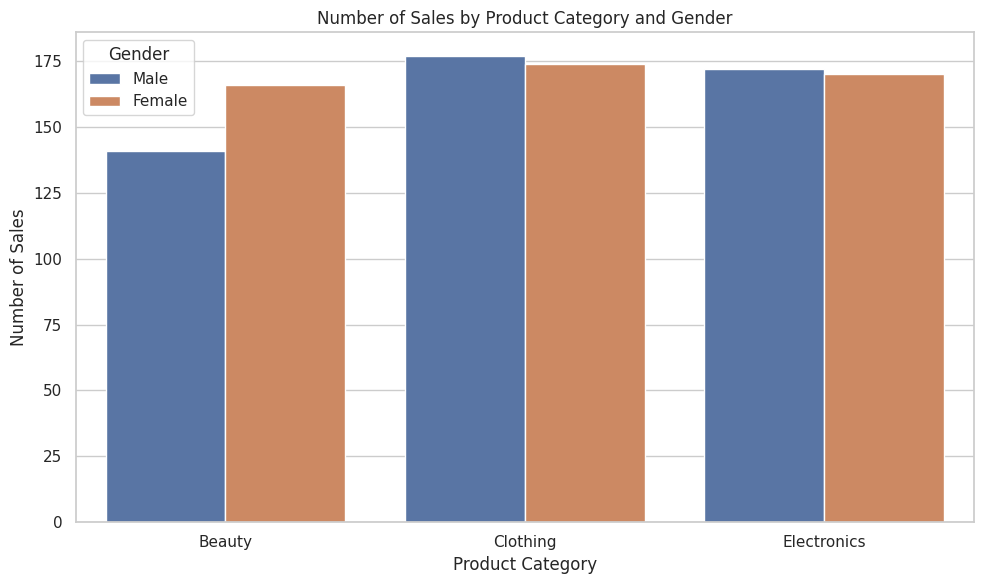

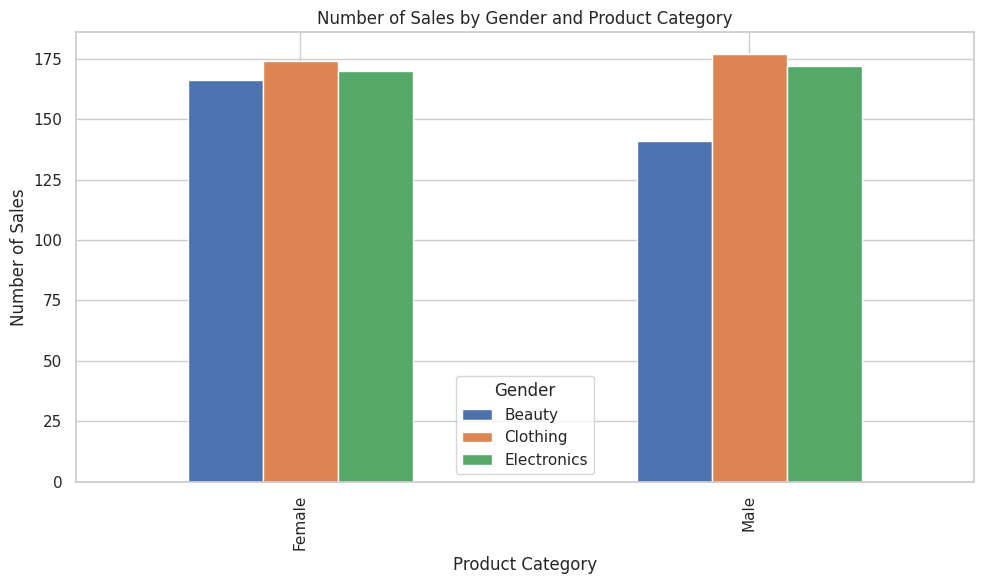

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Summary
sales_summary = df.groupby(['Gender', 'Product Category'])['Transaction ID'].count().unstack()
print('--------------------------------------------------------------------')
print("Number of Sales by Gender and Product Category")
print(sales_summary)

# 2. Count Plot: Sales by Gender for Each Product Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category', hue='Gender')
plt.title('Number of Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
plt.close()

# 4. Grouped Bar Chart: Sales by Gender and Product Category
sales_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Sales by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
plt.close()



<Figure size 1000x600 with 0 Axes>

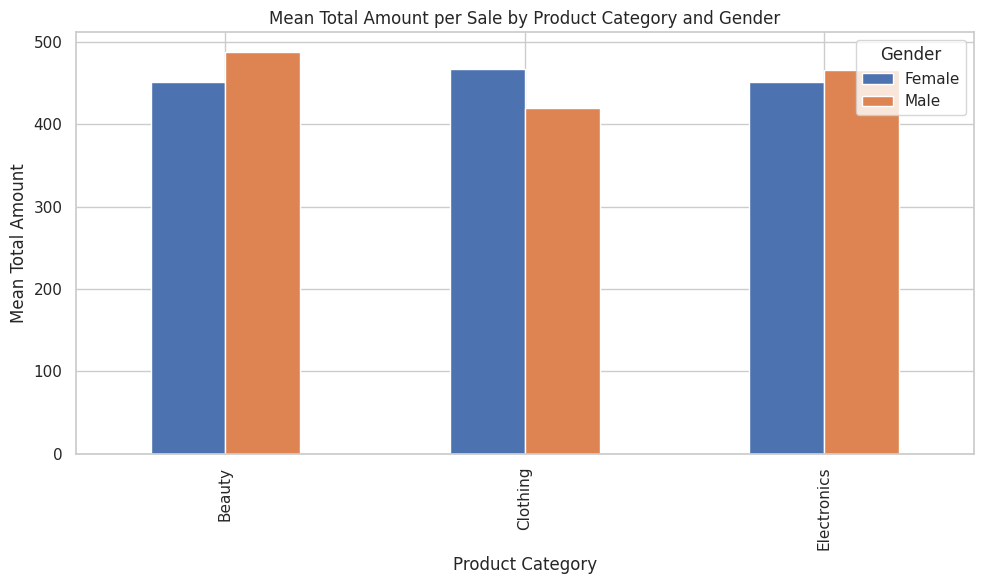

In [16]:
plt.figure(figsize=(10, 6))
price_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Total Amount per Sale by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Mean Total Amount')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
plt.close()

In [17]:
# Verify Total Amount (Quantity * Price per Unit)
df['Calculated_Total'] = df['Quantity'] * df['Price per Unit']
mismatches = df[df['Total Amount'] != df['Calculated_Total']]
print(f"Total Amount Mismatches: {len(mismatches)}")

# 2. Logical Calculations: Weighted Average Price per Unit by Product Category
# Calculate weighted Price per Unit: (Sum of (Price per Unit * Quantity)) / Total Quantity
df['Weighted_Price'] = df['Price per Unit'] * df['Quantity']
weighted_avg_price = df.groupby('Product Category').apply(
    lambda x: x['Weighted_Price'].sum() / x['Quantity'].sum()
).reset_index(name='Weighted Avg Price per Unit')
print("\n=== Weighted Average Price per Unit by Product Category ===")
print(weighted_avg_price)

# Weighted Average Price per Unit by Product Category and Gender
weighted_avg_price_gender = df.groupby(['Product Category', 'Gender']).apply(
    lambda x: x['Weighted_Price'].sum() / x['Quantity'].sum()
).unstack()
print("\n=== Weighted Average Price per Unit by Product Category and Gender ===")
print(weighted_avg_price_gender)

# Sales Counts by Product Category and Gender
sales_count = df.groupby(['Product Category', 'Gender'])['Transaction ID'].count().unstack()
print("\n=== Number of Sales by Product Category and Gender ===")
print(sales_count)

# Statistical Test: Is Electronics' Price per Unit higher?
electronics_price = df[df['Product Category'] == 'Electronics']['Price per Unit']
beauty_price = df[df['Product Category'] == 'Beauty']['Price per Unit']
clothing_price = df[df['Product Category'] == 'Clothing']['Price per Unit']
ttest_electronics_vs_beauty = ttest_ind(electronics_price, beauty_price, equal_var=False)
ttest_electronics_vs_clothing = ttest_ind(electronics_price, clothing_price, equal_var=False)
print("\n=== T-Test: Electronics vs. Beauty (Price per Unit) ===")
print(f"p-value: {ttest_electronics_vs_beauty.pvalue:.4f}")
print("=== T-Test: Electronics vs. Clothing (Price per Unit) ===")
print(f"p-value: {ttest_electronics_vs_clothing.pvalue:.4f}")

Total Amount Mismatches: 0

=== Weighted Average Price per Unit by Product Category ===
  Product Category  Weighted Avg Price per Unit
0           Beauty                   186.141375
1         Clothing                   174.026846
2      Electronics                   184.811543

=== Weighted Average Price per Unit by Product Category and Gender ===
Gender                Female        Male
Product Category                        
Beauty            179.019139  194.575071
Clothing          184.297052  164.028698
Electronics       174.794989  195.536585

=== Number of Sales by Product Category and Gender ===
Gender            Female  Male
Product Category              
Beauty               166   141
Clothing             174   177
Electronics          170   172

=== T-Test: Electronics vs. Beauty (Price per Unit) ===
p-value: 0.8866
=== T-Test: Electronics vs. Clothing (Price per Unit) ===
p-value: 0.5934


/tmp/ipykernel_36/730562978.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_price = df.groupby('Product Category').apply(
/tmp/ipykernel_36/730562978.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_price_gender = df.groupby(['Product Category', 'Gender']).apply(
